In [1]:
!sudo apt-get install -y fonts-nanum #코랩 한글 폰트 꺠짐 방지 폰트 설치
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,705 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and d

In [1]:
!pip install mxnet
!pip install gluonnlp
!pip install sentencepiece
!pip install transformers
!pip install torch

     |████████████████████████████████| 47.3 MB 1.2 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 344 kB 7.8 MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp37-cp37m-linux_x86_64.whl size=595734 sha256=9a19322beb17e2da22b797b4f2bd34db4c31fbf0bc78d53540ef8b4334ba7b79
  Stored in directory: /root/.cache/pip/wheels/be/b4/06/7f3fdfaf707e6b5e98b79c041e023acffbe395d78a527eae00
Successfully built gluonnlp
     |████████████████████████████████| 1.2 MB 9.5 MB/s 
     |████████████████████████████████| 3.4 MB 7.0 MB/s 
     |████████████████████████████████| 67 kB 5.5 MB/s 
     |████████████████████████████████| 895 kB 43.5 MB/s 
     |████████████████████████████████| 3.3 MB 34.7 MB/s 
     |████████████████████████████████| 596 kB 48.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# 한국어 출력
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath,size=9)
plt.rc('font',family='NanumBarunGothic')
%matplotlib inline

In [3]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-6ibz56kj
  Running command git clone -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-6ibz56kj
     |████████████████████████████████| 131 kB 8.1 MB/s 
     |████████████████████████████████| 4.5 MB 51.3 MB/s 
     |████████████████████████████████| 8.5 MB 40.0 MB/s 
     |████████████████████████████████| 79 kB 7.7 MB/s 
     |████████████████████████████████| 127 kB 37.9 MB/s 
  Created wheel for kobert: filename=kobert-0.2.3-py3-none-any.whl size=15449 sha256=4a23445fcc576b9163fada8cf6134553d12fe09a12b77286d860279a1afa76a5
  Stored in directory: /tmp/pip-ephem-wheel-cache-2zdsw5yq/wheels/d3/68/ca/334747dfb038313b49cf71f84832a33372f3470d9ddfd051c0
Successfully built kobert
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not

In [4]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
from tqdm import tqdm, tqdm_notebook

from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [5]:
# headline 데이터 가져오기

df = pd.read_csv('/content/drive/MyDrive/final_project/final_df.csv',index_col=0)
df.reset_index(inplace=True)
del df['index']
df

,name,headline,date,change,token_mecab
0,삼성전자,"[TV] 재계 총수들, 일자리 창출과 투자 확대 강조",2012-01-02,1,TV 재계 총수 일자리 창출 투자 확대 강조
1,셀트리온,"코스닥, 새해 첫 거래일 소폭 오름세 지속",2012-01-02,0,코스닥 새해 거래일 소폭 오름세 지속
2,셀트리온,코스닥 새해 첫 거래일 소폭 오름세 지속,2012-01-02,0,코스닥 새해 거래일 소폭 오름세 지속
3,셀트리온,"코스닥, 개인·기관 '사자'에 상승 지속…저출산株 강세",2012-01-02,0,코스닥 개인 기관 사자 상승 지속 저출산 종목 강세
4,셀트리온,"코스피, 외인 '팔자'에 약세 전환…방향성 탐색",2012-01-02,0,코스피 외인 팔자 약세 전환 방향 탐색
...,...,...,...,...,...
233699,SK하이닉스,"""코로나 봉쇄로 삼성 시안공장 생산 줄여…메모리 공급사 주가에는 긍정적 영향""",2021-12-30,1,코로나 봉쇄 삼성 시안 공장 생산 메모리 공급 주가 긍정 영향
233700,SK하이닉스,"SK하이닉스, 인텔 낸드 1단계 인수",2021-12-30,1,SK 하이닉스 인텔 낸드 단계 인수
233701,SK하이닉스,"SK하이닉스, 특별성과급 300% 쏜다",2021-12-30,1,SK 하이닉스 특별
233702,셀트리온,"삼성바이오로직스-셀트리온, 바이오 대장주 희비",2021-12-30,0,삼성 바이오 로직스 트리 장주 희비


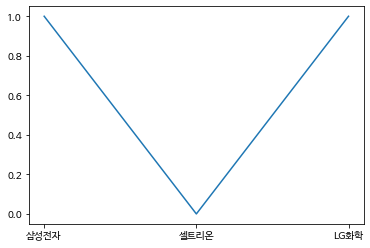

In [6]:
# 한국어 test
plt.plot(df['name'][:10],df['change'][:10])

In [7]:
# 정렬된 date에서 train과 test split 진행 (기준은 2020년 1월 1일)
df['date'] = pd.to_datetime(df['date'])
train = df[df['date'] < pd.to_datetime('2020-01-01')]
test = df[df['date'] >= pd.to_datetime('2020-01-01')]
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188530 entries, 0 to 188529
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   name         188530 non-null  object        
 1   headline     188530 non-null  object        
 2   date         188530 non-null  datetime64[ns]
 3   change       188530 non-null  int64         
 4   token_mecab  188501 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 8.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45174 entries, 188530 to 233703
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         45174 non-null  object        
 1   headline     45174 non-null  object        
 2   date         45174 non-null  datetime64[ns]
 3   change       45174 non-null  int64         
 4   token_mecab  45172 non-null  object        
dtypes: dateti

(None, None)

In [8]:
# mecab_token 제거
train.reset_index(inplace=True)
test.reset_index(inplace=True)
del train['index']
del test['index']

cols = ['headline','change']
train_data = train[cols]
test_data = test[cols]

In [9]:
print(train_data.shape)
print(test_data.shape)

(188530, 2)
(45174, 2)


In [10]:
## GPU
device = torch.device("cuda:0")
bertmodel, vocab = get_pytorch_kobert_model(cachedir=".cache")

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188530 entries, 0 to 188529
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   headline  188530 non-null  object
 1   change    188530 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ MB


In [12]:
# train test tsv 파일로 변환
train_data.to_csv("./train_file.tsv", sep='\t')
test_data.to_csv("./test_file.tsv", sep='\t')

In [13]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair) 

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [14]:
print(train_data.shape)
print(test_data.shape)

(188530, 2)
(45174, 2)


In [15]:
dataset_train = nlp.data.TSVDataset('./train_file.tsv',field_indices=[1,2], num_discard_samples=1)
dataset_test = nlp.data.TSVDataset('./test_file.tsv',field_indices=[1,2], num_discard_samples=1)

In [17]:
# 기본 Bert tokenizer 사용
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [22]:
max_len = 64 # 해당 길이를 초과하는 단어에 대해선 bert가 학습하지 않음
batch_size = 64

In [20]:
train_set = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
test_set = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)

In [23]:
# pytorch용 dataloader 사용
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, num_workers=5)

In [24]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=2,
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [25]:
device = torch.device("cuda:0")

model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)
final_md = torch.load('/content/drive/MyDrive/final_project/kobert_v2.pt',map_location=device)
final_md.load_state_dict(model.state_dict())
final_md.eval()


BERTClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(8002, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True

In [34]:
# 테스트 셋 예측

test_values = test_data.values
test_set = BERTDataset(test_values, 0, 1, tok, max_len, True, False)
test_input = torch.utils.data.DataLoader(test_set, batch_size=1, num_workers=2)

predict_list = []
for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_input)):
  token_ids = token_ids.long().to(device)
  segment_ids = segment_ids.long().to(device)
  valid_length= valid_length
  out = final_md(token_ids, valid_length, segment_ids)
  predict_list.append(out.tolist())

  0%|          | 0/45174 [00:00<?, ?it/s]

- CUDA out of memory 해결법 : 모델의 output을 그대로 넣지 말고, tolist()화 하여 메모리를 줄여라!!! 
- torch.cuda.empty_cache()로 해결안됨

In [33]:
import gc
gc.collect()
torch.cuda.empty_cache()

##test set 평가 준비

In [63]:
predict_list[1]

[[-0.10983827710151672, 0.06474293768405914]]

In [37]:
prediction = []
for scores in tqdm(predict_list):
  prediction.append(np.argmax(scores))

100%|██████████| 45174/45174 [00:00<00:00, 99798.26it/s] 


In [39]:
test['predict'] = prediction
test.head()

,name,headline,date,change,token_mecab,predict
0,카카오,"""기술 사대주의로는 AI 정복 힘들다""",2020-01-02,0,기술 사대주의 AI 정복 힘들,1
1,카카오,[해설]中 디지털 종속 우려...동남아 국가 '中 QR결제 금지' 초강수,2020-01-02,0,해설 중국 디지털 종속 우려 동남아 국가 중국 QR 결제 금지 강수,1
2,카카오,"씨티은행, 1.3%포인트 금리인하 직장인 신용대출..한달 연장 이벤트",2020-01-02,0,씨티 은행 포인트 금리 인하 직장 신용 대출 연장 이벤트,1
3,카카오,'소비자분쟁 통지서' 카톡으로 제공된다,2020-01-02,0,소비자 분쟁 통지서 카톡 제공,0
4,카카오,[이슈분석]키 잡은 공정위…배민-DH 합병 경우의 수,2020-01-02,0,이슈 분석 공정위 배민 DH 합병 경우,0


In [40]:
len(test['date'].unique())

496

In [41]:
from tqdm import tqdm

stock_pred_list = []
for name in tqdm(test['name'].unique()): # 10개 종목
    temp_list = []
    for date in tqdm(test['date'].unique()): # 종목 일자 별 predict 평균 매기기 
        avg_pred = np.mean(test[(test['date'] == date) & (test['name'] == name)]['predict']) # 일자별 감성 확률 평균 값
        temp_list.append(avg_pred)  
    stock_pred_list.append(temp_list)

100%|██████████| 10/10 [00:18<00:00,  1.81s/it]


In [42]:
result_df = pd.DataFrame({'카카오': stock_pred_list[0]}, index=test['date'].unique())

for idx, name in enumerate(test['name'].unique()[1:]):
    result_df[name] = stock_pred_list[idx + 1]

In [43]:
result_df.sort_index(inplace=True)

In [44]:
result_df.tail()

,카카오,SK하이닉스,KB금융,신한지주,삼성전자,셀트리온,현대차,LG화학,POSCO,NAVER
2021-12-24,0.600000,0.750000,0.111111,0.357143,0.500000,0.285714,0.555556,0.666667,0.500000,0.777778
2021-12-27,0.666667,0.833333,0.666667,NaN,0.400000,0.571429,0.727273,0.500000,1.000000,0.500000
2021-12-28,0.437500,0.333333,0.500000,1.000000,0.615385,0.500000,0.923077,0.800000,1.000000,0.583333
2021-12-29,0.533333,0.333333,0.666667,0.833333,0.545455,0.750000,0.750000,0.400000,1.000000,0.600000
2021-12-30,0.562500,0.800000,0.277778,0.571429,0.363636,0.363636,0.866667,0.750000,0.333333,0.500000


In [45]:
result_df.isnull().sum()

카카오         0
SK하이닉스      1
KB금융        4
신한지주       83
삼성전자        3
셀트리온        1
현대차         1
LG화학        1
POSCO     136
NAVER       6
dtype: int64

In [46]:
change = pd.read_csv('/content/drive/MyDrive/final_project/ten_change.csv', index_col=0)
change.tail()

,date,change,name
24725,2022-01-10,1,신한지주
24726,2022-01-11,1,신한지주
24727,2022-01-12,1,신한지주
24728,2022-01-13,0,신한지주
24729,2022-01-14,0,신한지주


In [47]:
change['date'] = pd.to_datetime(change['date'])

split_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2021-12-30')

change_test = change[(change['date'] >= split_date) & (change['date'] <= end_date)]

In [48]:
change_test

,date,change,name
1967,2020-01-02,0,삼성전자
1968,2020-01-03,1,삼성전자
1969,2020-01-06,0,삼성전자
1970,2020-01-07,1,삼성전자
1971,2020-01-08,1,삼성전자
...,...,...,...
24715,2021-12-24,0,신한지주
24716,2021-12-27,0,신한지주
24717,2021-12-28,1,신한지주
24718,2021-12-29,0,신한지주


In [49]:
change_df = pd.DataFrame({'삼성전자': change_test[change_test['name'] == '삼성전자']['change'].values}, index=change_test['date'].unique())
change_df.head()

,삼성전자
2020-01-02,0
2020-01-03,1
2020-01-06,0
2020-01-07,1
2020-01-08,1


In [50]:
for name in change_test['name'].unique()[1:]:
    change_df[name] = change_test[change_test['name'] == name]['change'].values

In [51]:
change_df.tail()

,삼성전자,SK하이닉스,NAVER,LG화학,현대차,카카오,셀트리온,POSCO,KB금융,신한지주
2021-12-24,1,1,1,0,1,1,0,1,0,0
2021-12-27,0,0,0,1,0,0,1,0,0,0
2021-12-28,1,1,1,1,1,1,1,1,1,1
2021-12-29,0,0,0,0,0,1,0,0,0,0
2021-12-30,0,1,0,0,0,0,0,0,0,0


In [52]:
change_df.columns

Index(['삼성전자', 'SK하이닉스', 'NAVER', 'LG화학', '현대차', '카카오', '셀트리온', 'POSCO',
       'KB금융', '신한지주'],
      dtype='object')

In [53]:
# 각각 데이터프레임 생성

ten_df = []
def make_per_df(name):
  df = pd.DataFrame({'predict':result_df[name],'label': change_df[name]}, index = test['date'].unique())
  df['name'] = name
  df = df.sort_index()
  df.dropna(subset=['predict'],inplace=True)
  return df

def labeling(df):
  df['predict'][df['predict'] < 0.5] = 0
  df['predict'][df['predict'] >= 0.5] = 1
  return df


names = change_df.columns

for name in names:
  df = make_per_df(name)
  label_df = labeling(df)
  ten_df.append(label_df)

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

%matplotlib inline

In [55]:
acc_list = []
precision_up = []; precision_down = []
company = ['samsung elec', 'sk hynix', 'naver', 'lg chem', 'hyundai car', 'kakao', 'celtrion', 'posco', 'kb finance', 'shinhan']
for df in ten_df:
  acc_list.append(accuracy_score(df['label'], df['predict']))
  precision_up.append(precision_score(df['label'], df['predict'],pos_label=1))
  precision_down.append(precision_score(df['label'], df['predict'],pos_label=0))

In [56]:
acc_df = pd.DataFrame({'company':company, 'accuracy': acc_list})
pre_up = pd.DataFrame({'company': company, 'precision': precision_up})
pre_down = pd.DataFrame({'company': company, 'precision': precision_down})

acc_df.set_index('company',inplace=True)
pre_up.set_index('company', inplace=True)
pre_down.set_index('company', inplace=True)

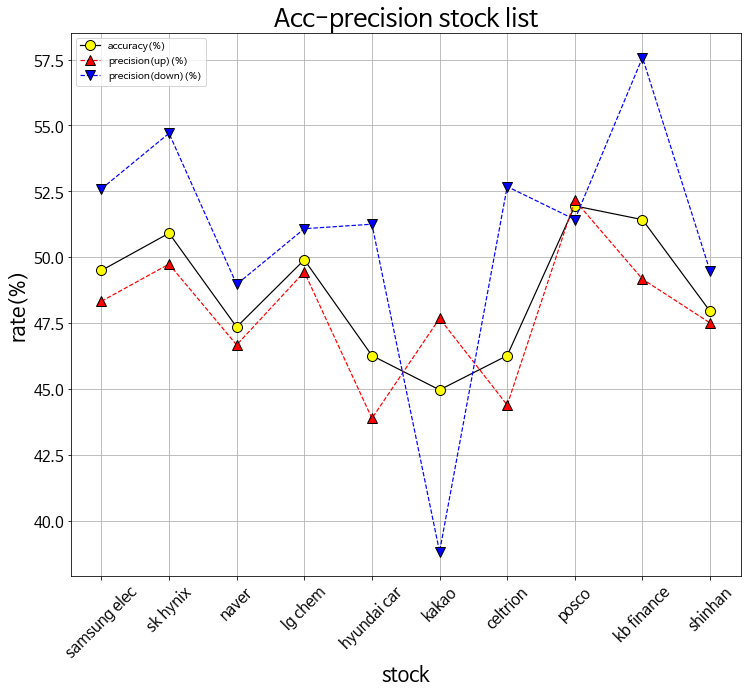

In [57]:
plt.figure(figsize=(12, 10))
plt.plot(acc_df.index, acc_df['accuracy'] * 100,
         label='accuracy(%)',
         linestyle='-',
         linewidth=1.2,
         color='black',
         marker='o',
         markersize=10,
         markerfacecolor='yellow',
         markeredgecolor='black'
)

plt.plot(pre_up.index, pre_up['precision'] * 100,
         label='precision(up)(%)',
         linestyle='--',
         linewidth=1.2,
         color='red',
         marker='^',
         markersize=10,
         markerfacecolor='red',
         markeredgecolor='black'
)

plt.plot(pre_down.index, pre_down['precision'] * 100,
         label='precision(down)(%)',
         linestyle='--',
         linewidth=1.2,
         color='blue',
         marker='v',
         markersize=10,
         markerfacecolor='blue',
         markeredgecolor='black'
)

plt.title('Acc-precision stock list', size=25)
plt.xlabel("stock", size=20)
plt.ylabel("rate(%)", size=20)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(loc='best')
plt.show()

In [61]:
print('kobert 10 accuracy mean: ', np.mean(acc_list))
print('kobert 10 precision(up) mean: ', np.mean(precision_up))
print('kobert 10 precision(down) mean: ', np.mean(precision_down))

kobert 10 accuracy mean:  0.4864419474286591
kobert 10 precision(up) mean:  0.4789293090035186
kobert 10 precision(down) mean:  0.5085491567234566


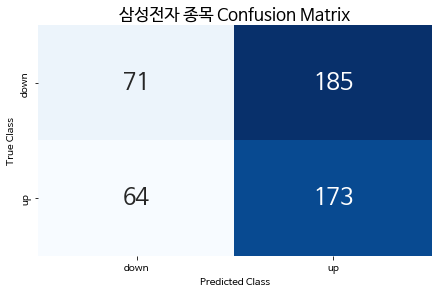

              precision    recall  f1-score   support

        down       0.53      0.28      0.36       256
          up       0.48      0.73      0.58       237

    accuracy                           0.49       493
   macro avg       0.50      0.50      0.47       493
weighted avg       0.51      0.49      0.47       493



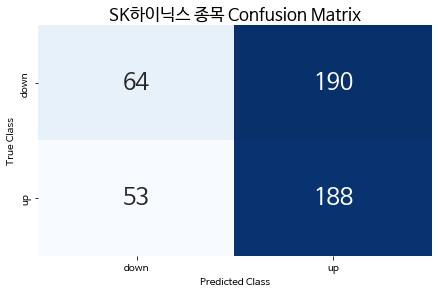

              precision    recall  f1-score   support

        down       0.55      0.25      0.35       254
          up       0.50      0.78      0.61       241

    accuracy                           0.51       495
   macro avg       0.52      0.52      0.48       495
weighted avg       0.52      0.51      0.47       495



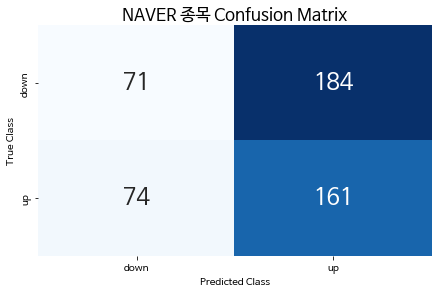

              precision    recall  f1-score   support

        down       0.49      0.28      0.35       255
          up       0.47      0.69      0.56       235

    accuracy                           0.47       490
   macro avg       0.48      0.48      0.46       490
weighted avg       0.48      0.47      0.45       490



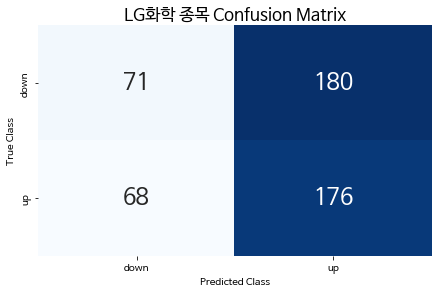

              precision    recall  f1-score   support

        down       0.51      0.28      0.36       251
          up       0.49      0.72      0.59       244

    accuracy                           0.50       495
   macro avg       0.50      0.50      0.48       495
weighted avg       0.50      0.50      0.47       495



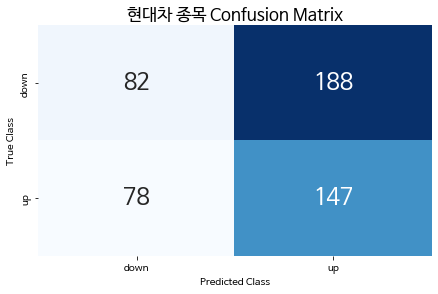

              precision    recall  f1-score   support

        down       0.51      0.30      0.38       270
          up       0.44      0.65      0.52       225

    accuracy                           0.46       495
   macro avg       0.48      0.48      0.45       495
weighted avg       0.48      0.46      0.45       495



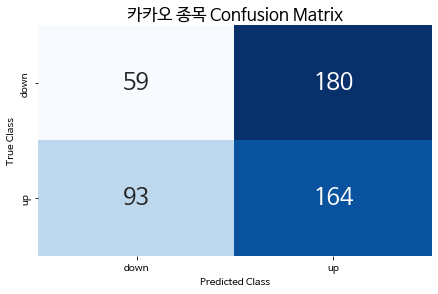

              precision    recall  f1-score   support

        down       0.39      0.25      0.30       239
          up       0.48      0.64      0.55       257

    accuracy                           0.45       496
   macro avg       0.43      0.44      0.42       496
weighted avg       0.43      0.45      0.43       496



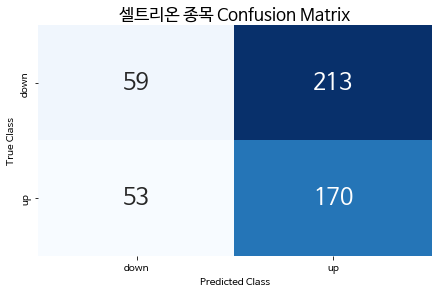

              precision    recall  f1-score   support

        down       0.53      0.22      0.31       272
          up       0.44      0.76      0.56       223

    accuracy                           0.46       495
   macro avg       0.49      0.49      0.43       495
weighted avg       0.49      0.46      0.42       495



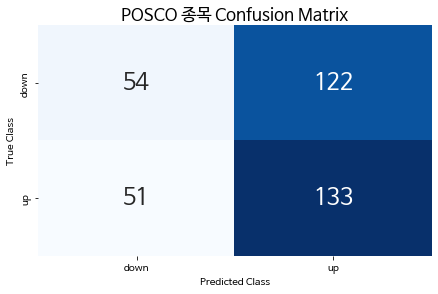

              precision    recall  f1-score   support

        down       0.51      0.31      0.38       176
          up       0.52      0.72      0.61       184

    accuracy                           0.52       360
   macro avg       0.52      0.51      0.50       360
weighted avg       0.52      0.52      0.50       360



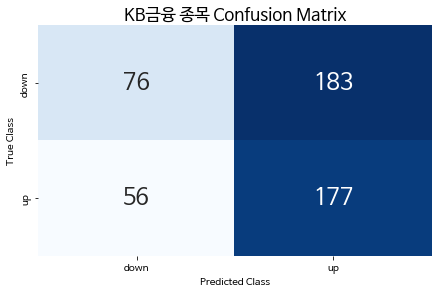

              precision    recall  f1-score   support

        down       0.58      0.29      0.39       259
          up       0.49      0.76      0.60       233

    accuracy                           0.51       492
   macro avg       0.53      0.53      0.49       492
weighted avg       0.54      0.51      0.49       492



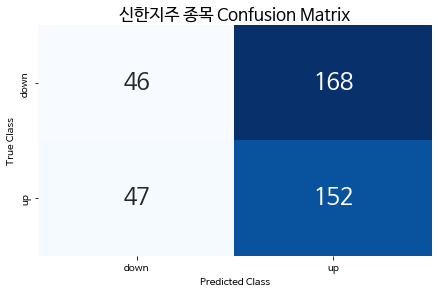

              precision    recall  f1-score   support

        down       0.49      0.21      0.30       214
          up       0.47      0.76      0.59       199

    accuracy                           0.48       413
   macro avg       0.48      0.49      0.44       413
weighted avg       0.49      0.48      0.44       413



In [62]:
def make_confusion_matrix(df):
  matrix = confusion_matrix(df.label, df.predict)
  class_names = ['down', 'up']
  dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

  sns.heatmap(dataframe, annot=True, annot_kws = {'size' : 23}, fmt='d', cbar=None, cmap='Blues')
  name = df.name.unique()[0]
  plt.title(f'{name} 종목 Confusion Matrix',size=17)
  plt.tight_layout()
  plt.ylabel('True Class')
  plt.xlabel('Predicted Class')
  plt.show()
  print(classification_report(df.label, df.predict, target_names=class_names))

for df in ten_df:
  make_confusion_matrix(df)

In [ ]:
- kobert에서 headline 워딩 그대로 입력